In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob

"""Change to the data folder"""
train_path = "../data/test-data"
val_path="../data/validation-data"
# number of sequences in each dataset
# train:205942  val:3200 test: 36272 
# sequences sampled at 10HZ rate

### Create a dataset class 

In [5]:
class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform

        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()
        
    def __len__(self):
        return len(self.pkl_list)

    def __getitem__(self, idx):

        pkl_path = self.pkl_list[idx]
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            
        if self.transform:
            data = self.transform(data)

        return data


# intialize a dataset
val_dataset  = ArgoverseDataset(data_path=val_path)
train_dataset=ArgoverseDataset(data_path=train_path)

### Create a loader to enable batch processing

In [6]:
batch_sz = 4

def my_collate(batch):
    """ collate lists of samples into batches, create [ batch_sz x agent_sz x seq_len x feature] """
    inp = [numpy.dstack([scene['p_in'], scene['v_in']]) for scene in batch]
    out = [numpy.dstack([scene['p_out'], scene['v_out']]) for scene in batch]
    inp = torch.LongTensor(inp)
    out = torch.LongTensor(out)
    return [inp, out]

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_sz, 
    shuffle = False, 
    collate_fn=my_collate, 
    num_workers=0
)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_sz, 
    shuffle = False, 
    collate_fn=my_collate, 
    num_workers=0
)

### Visualize the batch of sequences

<ipython-input-6-0e74544fbc5e>:7: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  inp = torch.LongTensor(inp)
<ipython-input-6-0e74544fbc5e>:8: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  out = torch.LongTensor(out)


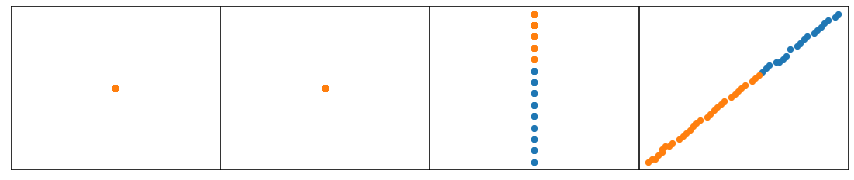

In [9]:
import matplotlib.pyplot as plt
import random

agent_id = 0

def show_sample_batch(sample_batch, agent_id):
    """visualize the trajectory for a batch of samples with a random agent"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
#         axs[i].scatter(inp[i, agent_id,:,0], inp[i, agent_id,:,1])
#         axs[i].scatter(out[i, agent_id,:,0], out[i, agent_id,:,1])
        axs[i].scatter(inp[i, agent_id,:,0], inp[i, agent_id,:,1])
        axs[i].scatter(out[i, agent_id,:,0], out[i, agent_id,:,1])

        
for i_batch, sample_batch in enumerate(train_loader):
    inp, out = sample_batch
    """TODO:
      Deep learning model
      training routine
    """
    show_sample_batch(sample_batch, agent_id)
    break

In [6]:
help(train_loader)

Help on DataLoader in module torch.utils.data.dataloader object:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable`

In [10]:
len(train_loader)

51486

In [11]:
len(val_loader)

800

In [18]:
train_file='/home/apfriend/ucsd/CURRENT/cse151b/kaggle/data/new_train/new_train/0.pkl'
with open(train_file, 'rb') as f:
    data = pickle.load(f)
data.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])

In [19]:
data

{'city': 'PIT',
 'lane': array([[3278.8716, 1968.7596,    0.    ],
        [3282.6606, 1972.2533,    0.    ],
        [3286.4429, 1975.7545,    0.    ],
        [3290.2249, 1979.2559,    0.    ],
        [3294.007 , 1982.7572,    0.    ],
        [3297.789 , 1986.2584,    0.    ],
        [3301.5713, 1989.7598,    0.    ],
        [3305.3533, 1993.2611,    0.    ],
        [3309.1355, 1996.7623,    0.    ],
        [3269.4802, 1967.0625,    0.    ],
        [3267.2764, 1965.0217,    0.    ],
        [3265.0664, 1962.9877,    0.    ],
        [3262.8562, 1960.9536,    0.    ],
        [3260.646 , 1958.9197,    0.    ],
        [3258.436 , 1956.8856,    0.    ],
        [3256.2258, 1954.8517,    0.    ],
        [3254.0132, 1952.8207,    0.    ],
        [3251.7898, 1950.8013,    0.    ],
        [3235.7622, 1935.9915,    0.    ],
        [3231.5237, 1932.1249,    0.    ],
        [3227.2852, 1928.2582,    0.    ],
        [3223.0923, 1924.343 ,    0.    ],
        [3218.9045, 1920.4214,

In [20]:
predictors=['lane', 'lane_norm','car_mask', 'p_in', 'v_in','track_id']
[len(data[p]) for p in predictors]

[72, 72, 60, 60, 60, 60]

In [14]:
for idx, batch, in enumerate(train_loader):
    print(batch["predictors"])
    break

<ipython-input-3-0e74544fbc5e>:7: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  inp = torch.LongTensor(inp)
<ipython-input-3-0e74544fbc5e>:8: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  out = torch.LongTensor(out)


TypeError: list indices must be integers or slices, not str